# Etudes de phénomènes aérospatiaux non identifiés (PAN) de 1910 à 2014

# Communiquez vos résultats - partie 3
# Analyse des PAN aux USA, au Royaume-Uni et au Canada

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description-du-fichier" data-toc-modified-id="Description-du-fichier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description du fichier</a></span></li><li><span><a href="#Analyse-des-variables" data-toc-modified-id="Analyse-des-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse des variables</a></span><ul class="toc-item"><li><span><a href="#Analyse-univariée" data-toc-modified-id="Analyse-univariée-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analyse univariée</a></span><ul class="toc-item"><li><span><a href="#Etude-et-traitement-des-outliers-dont-des-valeurs-aberrantes-(plusieurs-années!)" data-toc-modified-id="Etude-et-traitement-des-outliers-dont-des-valeurs-aberrantes-(plusieurs-années!)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Etude et traitement des outliers dont des valeurs aberrantes (plusieurs années!)</a></span></li><li><span><a href="#Visualisation-des-valeurs-continues-sans-les-outliers" data-toc-modified-id="Visualisation-des-valeurs-continues-sans-les-outliers-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Visualisation des valeurs continues sans les outliers</a></span></li></ul></li><li><span><a href="#Analyses-bivariées" data-toc-modified-id="Analyses-bivariées-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyses bivariées</a></span><ul class="toc-item"><li><span><a href="#Test-d'ANOVA" data-toc-modified-id="Test-d'ANOVA-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Test d'ANOVA</a></span></li><li><span><a href="#Test-du-chi2" data-toc-modified-id="Test-du-chi2-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Test du chi2</a></span></li></ul></li></ul></li><li><span><a href="#Etude-des-phénomènes-(USA,-Canada,-UK)" data-toc-modified-id="Etude-des-phénomènes-(USA,-Canada,-UK)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Etude des phénomènes (USA, Canada, UK)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Etude-des-UFO_shape" data-toc-modified-id="Etude-des-UFO_shape-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Etude des <code>UFO_shape</code></a></span></li><li><span><a href="#Etude-temporelle-des-phénomènes" data-toc-modified-id="Etude-temporelle-des-phénomènes-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Etude temporelle des phénomènes</a></span></li><li><span><a href="#Etude-géographique-des-phénomènes" data-toc-modified-id="Etude-géographique-des-phénomènes-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Etude géographique des phénomènes</a></span></li></ul></li></ul></li></ul></div>

Importation des librairies nécessaires à l'exécution du code

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly
import plotly.express as px
import json
from datetime import datetime
import re
import datetime

# Librairies statistiques
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import ks_2samp

# Librairies visualisation
from folium import Choropleth
from folium.plugins import HeatMap
from urllib.request import urlopen
import pylab

import plotly.figure_factory as ff
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
# jupyter set up
init_notebook_mode(connected=True)

In [2]:
#  version de pandas
print(f'version pandas : {pd.__version__}')
#  version de numpy
print(f'version numpy : {np.__version__}')
#  version de folium
print(f'version folium : {folium.__version__}')
# version de plotly
print(f'version plotly : {plotly.__version__}')
#  version de plotly express
# print(f'version plotly express : {px.__version__}')

version pandas : 1.1.3
version numpy : 1.19.2
version folium : 0.12.1
version plotly : 4.14.3


In [3]:
ENCODAGE = 'UTF-8'

In [4]:
TEMPLATE = 'plotly_dark'

In [5]:
COLORS = {'Canada':'#fdca26',
          'United Kingdom':'#35b779',
          'USA':'#0d0887'}

In [6]:
COLOR_EVOLUTION = 'Plasma_r'
COLOR_UFO_SHAPE = px.colors.sequential.Mint
COLOR_UFO_DURATION = px.colors.sequential.Blues

In [7]:
sns.set(style="darkgrid")

In [8]:
def ks_2samp_test(col, df):
    """Test de Kolmogorov-Smirnov 
    Test d'adéquation à une loi normale.
    
    Parameters
    ----------
    col : variable à tester
    df : dataset étudié
    
    Le seuil alpha est fixé à 0.05
    
    Returns
    -------
    Un message indiquant la normalité ou non de la variable
    """
    
    alpha = 0.05
    stat, p_value = ks_2samp(df[col],
                             list(np.random.normal(np.mean(df[col]),
                                                   np.std(df[col]),
                                                   1000)
                                 )
                            )
    print(f'p_value :{p_value}')
    
    if p_value < alpha :
        return(f'HO rejetée, la variable {col} ne suit pas une loi normale')
    else :
        return (f'HO ne peut pas être rejetée, la variable {col} suit une loi NORMALE')

In [9]:
def eta_squared(df, X, Y):
    """Calcul de l'éta carré.
    Permet de calculer le rapport de corrélation.
        
    Parameters
    ----------
    df : dataset
    X : variable qualitative
    Y : variable quantitative
    
    Returns
    -------
    rapport de corrélation
    SCE/SCT    
    """
    
    sous_echantillon = df.copy()
    x = sous_echantillon[X]
    y = sous_echantillon[Y]
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

## Description du fichier

`df_ufo`

In [10]:
df_ufo = pd.read_csv("ufo_state_us_ca_gb_clean.csv",
                     encoding=ENCODAGE,
                     parse_dates=['dates_time'])
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales


Dimension du fichier

In [11]:
df_ufo.shape

(73872, 9)

Pays représentés

In [12]:
df_ufo.country.unique()

array(['United Kingdom', 'USA', 'Canada'], dtype=object)

Nombre de phénomènes observés par pays

In [13]:
df_ufo.country.value_counts()

USA               68486
Canada             3518
United Kingdom     1868
Name: country, dtype: int64

Vérification des valeurs nulles

In [14]:
df_ufo.isnull().sum()

dates_time                     0
city                           0
state/province                 0
country                        0
UFO_shape                      0
length_of_encounter_seconds    0
latitude                       0
longitude                      0
state                          0
dtype: int64

Vérification du type de variables

In [15]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73872 entries, 0 to 73871
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   dates_time                   73872 non-null  datetime64[ns]
 1   city                         73872 non-null  object        
 2   state/province               73872 non-null  object        
 3   country                      73872 non-null  object        
 4   UFO_shape                    73872 non-null  object        
 5   length_of_encounter_seconds  73872 non-null  float64       
 6   latitude                     73872 non-null  float64       
 7   longitude                    73872 non-null  float64       
 8   state                        73872 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 5.1+ MB


Il y a des valeurs aberrantes, outliers de `length_of_encounter_seconds`. Une durée correspond même à 31 ans !!

In [16]:
df_ufo['length_of_encounter_seconds'].sort_values(ascending=False)

14       9.783600e+07
72350    8.280000e+07
65476    6.627600e+07
60904    5.262320e+07
56865    5.262320e+07
             ...     
50149    1.000000e-02
61872    1.000000e-02
38211    1.000000e-02
22505    1.000000e-02
5480     1.000000e-03
Name: length_of_encounter_seconds, Length: 73872, dtype: float64

Création des colonnes temporelles pour une étude ultérieure

Création de la colonne `year`

In [17]:
# Création de la colonne "year"
df_ufo["year"] = df_ufo.dates_time.dt.year

Création d'une colonne `month` pour avoir les mois

In [18]:
#  création de la colonne "month"
df_ufo["month"] = df_ufo.dates_time.dt.month

Création d'une colonne `hour` pour avoir les heures

In [19]:
#  création de la colonne "hour"
df_ufo["hour"] = df_ufo.dates_time.dt.hour

Création d'une colonne `day` pour voir les jours

In [20]:
# Création de la colonne "day"
df_ufo['day'] = df_ufo.dates_time.dt.weekday

Dimension du fichier

In [21]:
df_ufo.shape

(73872, 13)

In [22]:
df_ufo.head()

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6
2,1974-10-10 21:30:00,Cardiff,CF,United Kingdom,disk,1200.0,51.500000,-3.200000,Wales,1974,10,21,3
3,1976-10-10 22:00:00,Stoke Mandeville,Ma,United Kingdom,cigar,3.0,51.783333,-0.783333,South East of England,1976,10,22,6
4,1985-10-10 20:25:00,Leeds,LS,United Kingdom,triangle,600.0,53.800000,-1.583333,Yorkshire and the Humber,1985,10,20,3


Export du fichier (pour Tableau)

In [23]:
df_ufo.to_csv("ufo_state_us_ca_gb_date.csv", index=False, encoding=ENCODAGE)

## Analyse des variables

### Analyse univariée

In [24]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6


Analyse de la colonne `UFO_shape` 

Nombre de formes différentes des phénomènes répertoriés

In [25]:
# Nombre de formes différentes
df_ufo.UFO_shape.nunique()

29

Description des formes des phénomènes

In [26]:
# Ventilation des formes
df_ufo.UFO_shape.value_counts()

light        15665
triangle      7515
circle        7133
fireball      5885
unknown       5267
other         5256
sphere        5100
disk          4804
oval          3504
formation     2322
cigar         1929
changing      1849
flash         1253
rectangle     1233
cylinder      1211
diamond       1101
chevron        915
teardrop       706
egg            701
cone           286
cross          221
delta            7
crescent         2
round            2
hexagon          1
flare            1
changed          1
pyramid          1
dome             1
Name: UFO_shape, dtype: int64

In [27]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6


Création d'une colonne `cat_UFO_shape` qui regroupe les différentes formes des phénomènes

In [28]:
var_light = ['light', 'flash', 'flare', 'fireball']
var_ovoid = ['sphere', 'teardrop',
             'egg', 'round', 'circle',
             'disk', 'oval',
             'crescent', 'round']
var_angle = ['chevron', 'delta',
             'rectangle', 'triangle',
             'diamond', 'cone',
             'pyramid', 'dome',
             'hexagon', 'cross', 'cone']
var_other = ['unknown', 'other']
var_cylinder = ['cigar', 'cylinder']
var_formation = ['formation']
var_changing = ['changing', 'changed']


for elt in var_light:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'light_shape'

for elt in var_ovoid:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'ovoid_shape'

for elt in var_angle:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'angular_shape'

for elt in var_other:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'other_shape'

for elt in var_cylinder:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'cylinder_shape'

for elt in var_formation:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'formation_shape'

for elt in var_changing:
    df_ufo.loc[df_ufo['UFO_shape'] == elt,
               'cat_UFO_shape'] = 'changing_shape'

Décompte des différents groupes de forme des phénomènes

In [29]:
# Décompte des nouveaux groupes de formes
df_ufo.cat_UFO_shape.value_counts()

light_shape        22804
ovoid_shape        21952
angular_shape      11281
other_shape        10523
cylinder_shape      3140
formation_shape     2322
changing_shape      1850
Name: cat_UFO_shape, dtype: int64

Nombre de groupes de forme créés

In [30]:
df_ufo.cat_UFO_shape.nunique()

7

Il y a beaucoup d'outliers

In [31]:
df_ufo["length_of_encounter_seconds"].describe()

count    7.387200e+04
mean     7.984872e+03
std      6.125952e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: length_of_encounter_seconds, dtype: float64

Distribution de la variable `length_of_encounter_seconds`

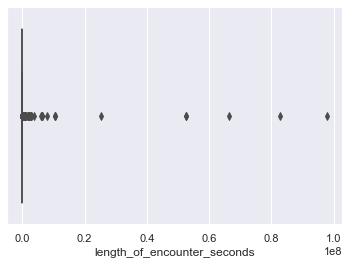

In [32]:
sns.boxplot(x="length_of_encounter_seconds",
            data=df_ufo,
            showfliers=True)
plt.show();

Il est recommandé de passer les données de `length_of_encounter_seconds` en log pour atténuer les différences et rendre cette variable plus gaussienne

Création d'une colonne `log_length_of_encounter_seconds`

In [33]:
df_ufo['log_length_of_encounter_seconds'] = df_ufo['length_of_encounter_seconds']\
.apply(np.log)
                                                

Distribution de la variable `log_length_of_encounter_seconds` (boxplot)

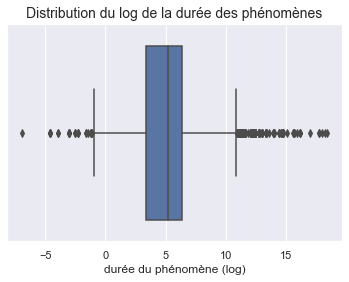

In [34]:
sns.boxplot(x="log_length_of_encounter_seconds",
            data=df_ufo,
            showfliers=True)
plt.xlabel('durée du phénomène (log)', size=12)
plt.title('Distribution du log de la durée des phénomènes', size=14)
plt.show();

Distribution de la variable `log_length_of_encounter_seconds`

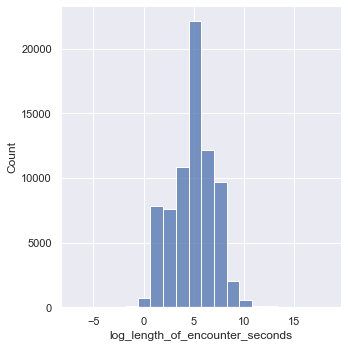

In [35]:
sns.displot(x="log_length_of_encounter_seconds",
            bins=20,
            data=df_ufo)

La variable semble avoir un kurtosis élevé. Elle n'apparaît pas suivre une loi normale.

#### Etude et traitement des outliers dont des valeurs aberrantes (plusieurs années!)

On considère qu'une durée du phénomène supérieure à 24 heures soit 86400 secondes est une donnée outlier

Récupération des données outliers

In [36]:
df_ufo_outliers = df_ufo.loc[df_ufo["length_of_encounter_seconds"] > 86400, :]

In [37]:
df_ufo_outliers.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds
14,1983-10-01 17:00:00,Birmingham,B,United Kingdom,sphere,97836000.0,52.466667,-1.916667,West Midlands,1983,10,17,5,ovoid_shape,18.398803
502,2008-01-26 00:00:00,Plymouth,PL,United Kingdom,triangle,172800.0,50.396389,-4.138611,South West of England,2008,1,0,5,angular_shape,12.059890


Fréquence des phénomènes les plus longs (supérieure à la journée)

Plotly

In [38]:
df_count_outlier = df_ufo_outliers.groupby(['cat_UFO_shape']).agg(
    count_ufo=('cat_UFO_shape', 'count')
).sort_values(by='count_ufo',
              ascending=True,
              ).reset_index()

In [39]:
df_count_outlier

,cat_UFO_shape,count_ufo
0,formation_shape,3
1,changing_shape,4
2,cylinder_shape,9
3,angular_shape,13
4,light_shape,33
5,other_shape,34
6,ovoid_shape,47


In [40]:
#  graph
fig = px.bar(df_count_outlier,
             y='cat_UFO_shape',
             x='count_ufo',
             text='count_ufo',
             labels={'count_ufo': 'Nombre de phénomènes',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='count_ufo',
             color_continuous_scale=COLOR_UFO_SHAPE,
             template=TEMPLATE)

# text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Fréquence des phénomènes outliers<br>'
                  '<sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

# axes
fig.update_xaxes(showgrid=True, ticks="outside")

# annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier "ufo_state_us_ca_gb_clean.csv" ' +
                        ' Outlier: durée supérieure à 86400 secondes soit 24 heures',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Beaucoup de phénomènes de longues durées sont mal identifiés (classés en "other"). Vu leurs durées, il est probable qu'ils soient complexes (light + disk...).  
Le phénomène le plus fréquent se présente sous forme ovoide.  
Le moins fréquent est une forme complexe (formation qui représente le déplacement synchronisé d'un phénomène).

Quels sont les phénomènes outliers les plus longs ?

In [41]:
# Récupération des données dont la durée est supérieure à 24h (86400 s)
# Calcul de la moyenne de la durée
df_ufo_outliers_count = df_ufo.loc[df_ufo["length_of_encounter_seconds"]
                                   > 86400,
                                   ["length_of_encounter_seconds",
                                    "cat_UFO_shape"]]\
    .groupby("cat_UFO_shape")\
    .agg(mean_length_of_encounter_seconds=("length_of_encounter_seconds",
                                           "mean"))\
    .reset_index()

In [42]:
df_ufo_outliers_count_order = df_ufo_outliers_count.sort_values(
    by='mean_length_of_encounter_seconds', ascending=True)

Visualisation de la fréquence des formes UFO pour des durées au moins égales à la journée

Plotly

In [43]:
# graph
fig = px.bar(df_ufo_outliers_count_order,
             y='cat_UFO_shape',
             x='mean_length_of_encounter_seconds',
             text='mean_length_of_encounter_seconds',
             labels={'mean_length_of_encounter_seconds': 'Durée moyenne du phénomène (seconde)',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='mean_length_of_encounter_seconds',
             color_continuous_scale=COLOR_UFO_DURATION,
             template=TEMPLATE)

# text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(
    title='Durée moyenne des phénomènes outliers<br><sup>USA, Canada, United Kingdom</sup>',
    showlegend=True)

# axes
fig.update_xaxes(showgrid=True, ticks="outside")

# annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier "ufo_state_us_ca_gb_clean.csv"  ' +
                        '  Outlier: durée supérieure à 86400 secondes soit 24 heures',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))


fig.update_layout(annotations=annotations)

fig.show()

Les formes lumineuses sont celles qui durent le plus longtemps.  
Les formes plus complexes sont plus "fugaces".

**Pour l'étude, seules les durées inférieures à 1800 secondes soit 30 minutes** seront prises en compte. Cette durée semble cohérente pour qu'un phénomène soit considéré comme PAN et non pas comme une observation mal répertoriée.

On écarte les données outliers du fichier

In [44]:
#  Suppression des valeurs aberrantes, outliers
# (d'une durée de plus de 30 minutes : 1800 s) du dataset
df_ufo.drop(df_ufo[df_ufo["length_of_encounter_seconds"] > 1800]
            .index, inplace=True)

Description de la variable `length_of_encounter_seconds`

In [45]:
df_ufo["length_of_encounter_seconds"].describe()

count    67274.000000
mean       330.717892
std        442.446764
min          0.001000
25%         30.000000
50%        120.000000
75%        420.000000
max       1800.000000
Name: length_of_encounter_seconds, dtype: float64

Les durées des phénomènes retenus varient, à présent, entre 1ms et 1800 s

Suppression des données concernant les formes "anecdotiques" (qui n'apparaissent qu'une seule fois)

#### Visualisation des valeurs continues sans les outliers

Visualisation de la variable `length_of_encounter_seconds` 

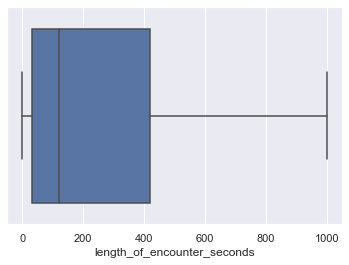

In [46]:
sns.boxplot(x="length_of_encounter_seconds",
            data=df_ufo,
            showfliers=False)
plt.show();

La représentation est nettement meilleure sans les outliers

Distribution de la variable `length_of_encounter_seconds`

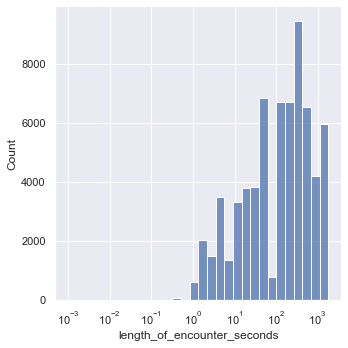

In [47]:
sns.displot(df_ufo, x="length_of_encounter_seconds",
            log_scale=True,
            bins=30)
plt.show();

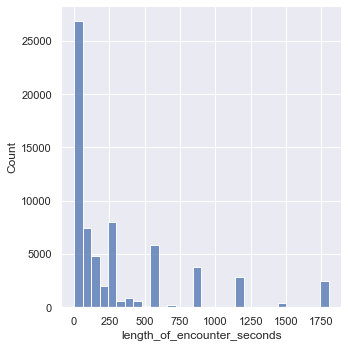

In [48]:
sns.displot(df_ufo, x="length_of_encounter_seconds", bins=30);

Vérification des types des variables

In [49]:
df_ufo.dtypes

dates_time                         datetime64[ns]
city                                       object
state/province                             object
country                                    object
UFO_shape                                  object
length_of_encounter_seconds               float64
latitude                                  float64
longitude                                 float64
state                                      object
year                                        int64
month                                       int64
hour                                        int64
day                                         int64
cat_UFO_shape                              object
log_length_of_encounter_seconds           float64
dtype: object

In [50]:
v_quantit = ['length_of_encounter_seconds', 'log_length_of_encounter_seconds']

Test de Kolmogorov-Smirnov pour tester l'adéquation à une loi normale des variables

In [51]:
for variable in v_quantit :
    print(f'{variable :-<32}{ks_2samp_test(variable, df_ufo)}\n') 

p_value :2.5441642724244316e-71
length_of_encounter_seconds-----HO rejetée, la variable length_of_encounter_seconds ne suit pas une loi normale

p_value :6.1244084561384494e-21
log_length_of_encounter_seconds-HO rejetée, la variable log_length_of_encounter_seconds ne suit pas une loi normale



Droite de Henry

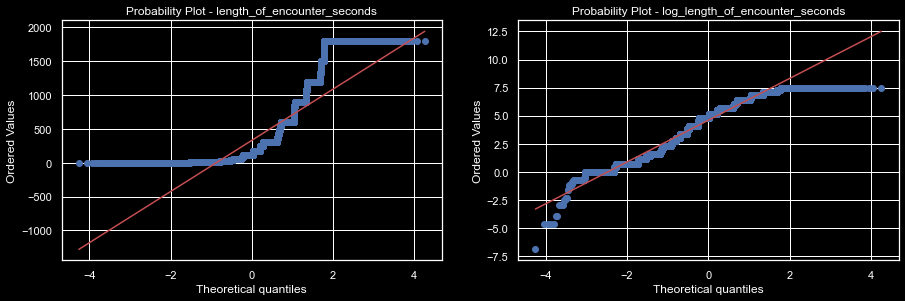

In [52]:
# variables quantitatives
variable_choisies = ['length_of_encounter_seconds', 'log_length_of_encounter_seconds']

a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.style.use("dark_background")
fig = plt.figure(figsize=(15, 15))

for variable in variable_choisies :    
    plt.subplot(a, b, c)
    measurements = df_ufo[variable]
    stats.probplot(measurements,
                   dist='norm',
                   plot=pylab)    
    plt.title("Probability Plot - " +  variable)
    c += 1
# plt.show()
plt.savefig("QQplot.jpg")

La variable `log_length_of_encounter_seconds` a une allure plus gaussienne que sans log

Compte tenu du nombre d'observations, on peut considérer les variables quantitatives comme gaussiennes

Dimension du dataset

In [53]:
df_ufo.shape

(67274, 15)

In [54]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957


Variables catégorielles

Visualisation de la fréquence des formes UFO pour des durées **au plus égales 30 minutes**

In [55]:
df_ufo_count_ss_outliers = df_ufo.groupby("cat_UFO_shape").agg(
    mean_length_of_encounter_seconds=(
        "length_of_encounter_seconds", "mean"),
    count_cat_UFO_shape=(
    "cat_UFO_shape", "count")
).reset_index(
).sort_values(by='mean_length_of_encounter_seconds')

In [56]:
df_ufo_count_ss_outliers.head(2)

,cat_UFO_shape,mean_length_of_encounter_seconds,count_cat_UFO_shape
2,cylinder_shape,308.018155,2933
0,angular_shape,310.628085,10446


Formes les plus courantes des phénomènes

Plotly

In [57]:
df_ufo_count_ss_outliers = df_ufo_count_ss_outliers.sort_values(
    by="count_cat_UFO_shape")

In [58]:
# Graph
fig = px.bar(df_ufo_count_ss_outliers,
             y='cat_UFO_shape',
             x='count_cat_UFO_shape',
             text='count_cat_UFO_shape',
             labels={'count_cat_UFO_shape': 'Nombre de phénomènes',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='count_cat_UFO_shape',
             color_continuous_scale=COLOR_UFO_SHAPE,             
             template=TEMPLATE)

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Fréquence des phénomènes<br>'
                  '<sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

# Axes
fig.update_xaxes(showgrid=True, ticks="outside")

# Annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier "ufo_state_us_ca_gb_clean.csv"  ' +
                        ' phénomènes de durée au plus égale à 1800 secondes soit 30 minutes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

`light_shape`, suivi de `ovoid_shape` et de `angular_shape` sont les formes les plus courantes

Classement des formes en fonction de la durée de leur apparition

In [59]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957


In [60]:
# group by cat_UFO_shape and agglomerate by the mean of "length_of_encounter_seconds"
df_ufo_cat_ufo_length = df_ufo.groupby(
    ["cat_UFO_shape"])\
    .agg(mean_length_of_encounter_seconds=("length_of_encounter_seconds",
                                           "mean"))\
    .reset_index()

In [61]:
# sort by ascending values
df_ufo_cat_ufo_length_order = df_ufo_cat_ufo_length.sort_values(
    by='mean_length_of_encounter_seconds', ascending=True)

Classement des formes des phénomènes en fonction de leur durée décroissante

In [62]:
df_ufo_cat_ufo_length_order.reset_index(drop=True).head(7)

,cat_UFO_shape,mean_length_of_encounter_seconds
0,cylinder_shape,308.018155
1,angular_shape,310.628085
2,light_shape,315.619783
3,ovoid_shape,340.268147
4,other_shape,341.794973
5,formation_shape,349.282216
6,changing_shape,499.595153


Plotly

In [63]:
# graph
fig = px.bar(df_ufo_cat_ufo_length_order,
             y='cat_UFO_shape',
             x='mean_length_of_encounter_seconds',
             text='mean_length_of_encounter_seconds',
             labels={'mean_length_of_encounter_seconds': 'Durée moyenne du phénomène (seconde)',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='mean_length_of_encounter_seconds',
#              color_discrete_sequence=px.colors.sequential.Plasma_r,
             color_continuous_scale=COLOR_UFO_DURATION,
             template=TEMPLATE)

# text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Durée moyenne en fonction de la forme  des phénomènes<br>'
                  '<sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

# axes
fig.update_xaxes(showgrid=True, ticks="outside")

# annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source:  fichier "ufo_state_us_ca_gb_clean.csv"  ' +
                        ' phénomènes de durée au plus égale à 1800 secondes soit 30 minutes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

`changing_shape` est la forme dont la durée est la plus longue en moyenne  
`cylinder_shape` est la forme dont la durée est la plus courte en moyenne

Création de groupes de durée

In [64]:
df_ufo['gpe_duration'] = pd.cut(x=df_ufo['length_of_encounter_seconds'],
                                bins=[-np.inf, 60, 300, 900, 1500, np.inf],
                                labels=["<60s",
                                        "61-300s",
                                        "301-900s",
                                        "901-1500s",
                                        ">1500s"])

Dimension du dataset

In [65]:
df_ufo.shape

(67274, 16)

Analyse de la variable `gpe_duration`

<AxesSubplot:xlabel='gpe_duration', ylabel='Count'>

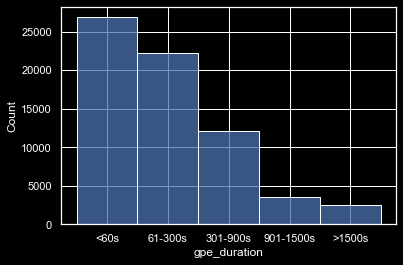

In [66]:
sns.histplot(df_ufo, x="gpe_duration")

Les événements de moins d'une minute sont majoritaires

Quelle est la durée moyenne la plus courante des phénomènes ?

In [67]:
# group by "gpe_duration" and agglomerate by the count of "cat_UFO_shape"
df_ufo_cat_duration = df_ufo.groupby(["gpe_duration"]
                                     ).agg(
    count_cat_UFO_shape=("cat_UFO_shape", "count")
                                             ).reset_index(
).sort_values(by="count_cat_UFO_shape")

In [68]:
df_ufo_cat_duration.head(2)

,gpe_duration,count_cat_UFO_shape
4,>1500s,2544
3,901-1500s,3561


In [69]:
# graph
fig = px.bar(df_ufo_cat_duration,
             y='gpe_duration',
             x='count_cat_UFO_shape',
             text='count_cat_UFO_shape',
             color='count_cat_UFO_shape',
             labels={'count_cat_UFO_shape': 'Nombre de phénomènes',
                     'gpe_duration': 'Groupe de durée du phénomène'},
             #              color='mean_length_of_encounter_seconds',
             #              color_discrete_sequence=px.colors.sequential.Plasma_r,
             color_continuous_scale=COLOR_UFO_DURATION,
             template=TEMPLATE)

# text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Une majorité de phénomènes de moins d\'une minute<br><sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

# axes
fig.update_xaxes(showgrid=True, ticks="outside")

# annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: PewResearch Center & ' +
                        'Storytelling with data',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Les phénomènes sont en majorité de moins de 60 secondes

###  Analyses bivariées

Etude des corrélations entre la variable quantitative (`length_of_encounter_seconds`) et la qualitative (`UFO_shape`)

#### Test d'ANOVA

**La durée des phénomènes est-elle dépendante ou non de la forme du phénomène ?**

In [70]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s


Création de groupe de catégorie de forme et log de la durée du phénomène

In [71]:
gp_ovoid = df_ufo[df_ufo['cat_UFO_shape'] ==
                  'ovoid_shape']['log_length_of_encounter_seconds']
gp_cylinder = df_ufo[df_ufo['cat_UFO_shape'] ==
                     'cylinder_shape']['log_length_of_encounter_seconds']
gp_angular = df_ufo[df_ufo['cat_UFO_shape'] ==
                    'angular_shape']['log_length_of_encounter_seconds']
gp_formation = df_ufo[df_ufo['cat_UFO_shape'] ==
                      'formation_shape']['log_length_of_encounter_seconds']
gp_light = df_ufo[df_ufo['cat_UFO_shape'] ==
                  'light_shape']['log_length_of_encounter_seconds']

In [72]:
gp_light

15       4.094345
16       2.079442
18       5.703782
19       5.480639
20       3.401197
           ...   
73859    4.787492
73860    5.480639
73861    5.703782
73865    0.693147
73871    5.192957
Name: log_length_of_encounter_seconds, Length: 20777, dtype: float64

Test d'ANOVA sur les groupes créés

Tests d'hypothèse  
H0 : les moyennes des groupes sont égales  
H1 : au moins une moyenne des groupes est différentes  
seuil alpha : 0.05

In [73]:
# Stats f_oneway functions takes the groups as input
# Returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(gp_ovoid,
                                gp_cylinder,
                                gp_angular,
                                gp_formation,
                                gp_light)
print(f'f_value {fvalue}, p_value : {pvalue}')

f_value 60.23101016145235, p_value : 7.553265174858454e-51


La p_value est significativement plus petite que le seuil alpha de 0.05%  
L'hypothèse H0 d'égalité des moyenne est rejetée.  
Ainsi, nous pouvons en conclure que **la durée des phénomènes diffèrent selon leur forme**

Distribution de `length_of_encounter_seconds` avec `cat_UFO_shape`

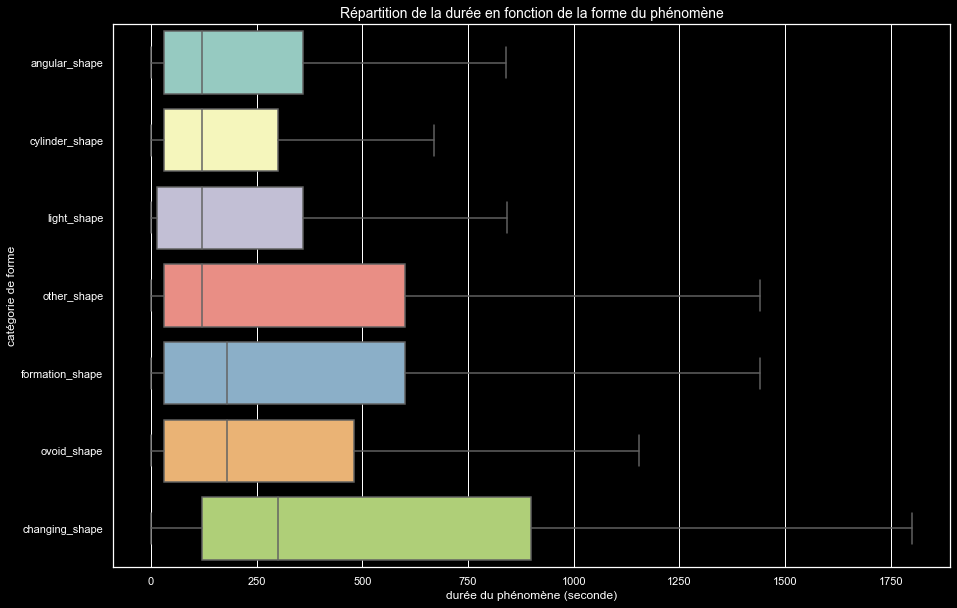

In [74]:
plt.style.use("dark_background")
plt.figure(figsize=(15, 10))

# sort by the median "length_of_encounter_seconds" values
UFO_shape_order = df_ufo.groupby('cat_UFO_shape')[
    'length_of_encounter_seconds'].median().sort_values().index

# graph
sns.boxplot(data=df_ufo, x='length_of_encounter_seconds',
            y='cat_UFO_shape',
            showfliers=False,
            order=UFO_shape_order)
# text
plt.title("Répartition de la durée en fonction de la forme du phénomène", size=14)
plt.xlabel("durée du phénomène (seconde)", size=12)
plt.ylabel("catégorie de forme", size=12)

# plt.show()
plt.savefig("Répartition de la durée en fonction de la forme du phénomène.jpg") 

Les phénomènes cylindriques et lumineux sont des phénomènes les plus "constants" et les plus courts. 

**La durée des phénomènes est-elle dépendante de la localisation du phénomène ?**

Test d'ANOVA  

Tests d'hypothèse  
H0 : les moyennes des groupes sont égales  
H1 : au moins une moyenne des groupes est différentes  
seuil alpha : 0.05

Création de groupes de pays (UK, USA et Canada)

In [75]:
country_list = df_ufo['country'].unique().tolist()

gpe_UK = df_ufo[df_ufo['country'] ==
                country_list[0]]['log_length_of_encounter_seconds']
gpe_USA = df_ufo[df_ufo['country'] ==
                 country_list[1]]['log_length_of_encounter_seconds']
gpe_CA = df_ufo[df_ufo['country'] ==
                country_list[2]]['log_length_of_encounter_seconds']

Test d'ANOVA sur les groupes créés

In [76]:
# stats f_oneway functions takes the groups as input 
# Returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(gpe_UK, gpe_USA, gpe_CA)
print(f'f_value {fvalue}, p_value : {pvalue}')

f_value 27.770188248234227, p_value : 8.801089190686768e-13


La f_value est significativement plus petite que le seuil de 5% choisi.  
L'hypothèse H0 d'égalité des moyenne peut être rejetée.  
Ainsi, nous pouvons conclure que **la durée des phénomènes diffèrent selon le pays**

#### Test du chi2 

Etude des corrélations entre variables qualitatives

H0 : variables indépendantes  

H1 : variables dépendantes  

seuil alpha de 0.05%

Variables : `cat_UFO_shape` et `country`

In [77]:
X = "cat_UFO_shape"
Y = "country"

c = df_ufo[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len)
cont = c.copy()

tx = df_ufo[X].value_counts()
ty = df_ufo[Y].value_counts()

cont.loc[:, "Total"] = tx
cont.loc["total", :] = ty
cont.loc["total", "Total"] = len(df_ufo)
cont

country,Canada,USA,United Kingdom,Total
cat_UFO_shape,,,,
angular_shape,442.0,9754.0,250.0,10446.0
changing_shape,70.0,1395.0,41.0,1506.0
cylinder_shape,143.0,2704.0,86.0,2933.0
formation_shape,103.0,2005.0,58.0,2166.0
light_shape,1030.0,19269.0,478.0,20777.0
other_shape,478.0,8723.0,213.0,9414.0
ovoid_shape,933.0,18477.0,622.0,20032.0
total,3199.0,62327.0,1748.0,67274.0


Tableau de corrélation entre les catégories de forme et les pays

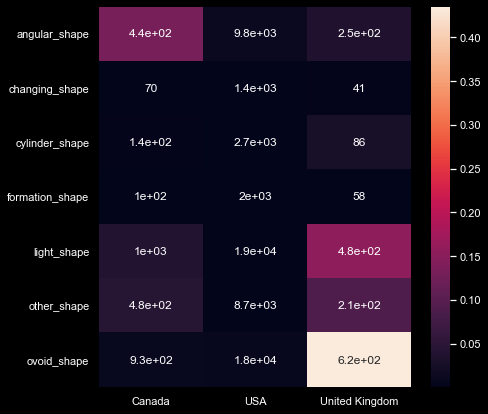

In [78]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(df_ufo)
indep = tx.dot(ty.T) / n

c = c.fillna(0)  # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
plt.figure(figsize=(7, 7))
sns.heatmap(mesure/xi_n, annot=c)
# plt.show()
plt.savefig("tableau de corrélation entre les catégories de forme et les pays.png")

In [79]:
xi_n = mesure.sum().sum()
print(f'xi_n: {xi_n}')

xi_n: 45.50494507784047


In [80]:
mesure = (c-indep)**2/indep
print(f'mesure: {mesure}')

mesure:                        Canada       USA  United Kingdom
angular_shape    6.029378e+00  0.599147        1.690653
changing_shape   3.633165e-02  0.000047        0.089284
cylinder_shape   8.937345e-02  0.065308        1.257906
formation_shape  7.582209e-08  0.001479        0.052577
light_shape      1.786831e+00  0.020446        7.087134
other_shape      2.057310e+00  0.000182        4.084043
ovoid_shape      4.015551e-01  0.361819       19.794139


Autre méthode de calcul du chi2

Variables : `country`, `state`, `hour`, `month`, `year`, `day`

Visualisation des tableaux crosstab et résultat du chi2

In [81]:
# variables qualitatives :
quali = ['country', 'state', 'hour', 'month', 'year', 'day', 'gpe_duration']

for variable in quali:
    temp = pd.crosstab(df_ufo['cat_UFO_shape'], df_ufo[variable])
    _, p_value, _, _ = chi2_contingency(temp)
    display(temp)
    print('p-value du test de chi2 :', p_value)

country,Canada,USA,United Kingdom
cat_UFO_shape,,,
angular_shape,442,9754,250
changing_shape,70,1395,41
cylinder_shape,143,2704,86
formation_shape,103,2005,58
light_shape,1030,19269,478
other_shape,478,8723,213
ovoid_shape,933,18477,622


p-value du test de chi2 : 8.44148997391496e-06


state,Alabama,Alaska,Alberta,Arizona,Arkansas,British Columbia,California,Colorado,Connecticut,Delaware,...,Vermont,Virginia,Wales,Washington,West Midlands,West Virginia,Wisconsin,Wyoming,Yorkshire and the Humber,Yukon Territory
cat_UFO_shape,,,,,,,,,,,,,,,,,,,,,
angular_shape,112,35,48,336,115,80,1305,230,131,34,...,38,195,17,503,27,71,165,21,24,0
changing_shape,8,3,3,63,13,15,243,34,11,3,...,6,29,2,75,5,7,21,4,3,0
cylinder_shape,27,12,13,85,37,29,310,64,51,1,...,14,59,6,113,11,27,47,5,4,0
formation_shape,12,5,17,115,11,18,287,42,16,6,...,12,35,3,119,9,13,60,5,3,0
light_shape,175,113,72,732,166,251,2630,399,254,41,...,98,336,21,1289,51,120,401,66,45,4
other_shape,78,34,55,328,75,120,1160,191,125,22,...,41,181,18,550,26,65,164,25,11,3
ovoid_shape,182,93,76,627,149,182,2574,392,261,52,...,73,400,38,1017,56,125,314,44,63,5


p-value du test de chi2 : 3.6617535311272565e-35


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cat_UFO_shape,,,,,,,,,,,,,,,,,,,,,
angular_shape,624,455,325,268,173,196,143,100,91,124,...,131,144,143,265,471,835,1181,1533,1511,1155
changing_shape,80,66,41,43,20,17,28,24,13,28,...,43,47,48,75,80,131,157,182,148,124
cylinder_shape,113,78,62,35,39,52,49,76,63,58,...,141,155,147,180,176,193,250,253,226,171
formation_shape,133,83,61,35,36,35,17,14,15,20,...,17,29,35,66,99,161,299,362,343,207
light_shape,1123,739,528,500,357,470,325,190,166,169,...,74,112,233,489,1024,1747,2580,3620,3385,2338
other_shape,569,379,326,262,199,196,165,101,99,124,...,182,198,207,336,497,688,938,1246,1183,875
ovoid_shape,1138,693,460,422,326,328,313,279,229,315,...,542,559,578,817,1072,1436,1969,2615,2414,1745


p-value du test de chi2 : 0.0


month,1,2,3,4,5,6,7,8,9,10,11,12
cat_UFO_shape,,,,,,,,,,,,
angular_shape,721,603,811,781,682,913,1069,1083,1008,1035,1004,736
changing_shape,116,88,108,124,113,138,159,132,147,149,134,98
cylinder_shape,176,153,178,220,210,333,399,350,268,275,215,156
formation_shape,161,116,171,165,144,165,210,214,196,218,244,162
light_shape,1482,1198,1311,1306,1236,1850,2681,2370,2030,1900,1828,1585
other_shape,656,571,616,663,644,988,1032,972,884,903,808,677
ovoid_shape,1360,1139,1262,1359,1379,2362,2615,2100,1835,1822,1470,1329


p-value du test de chi2 : 1.095938628732157e-56


year,1910,1920,1925,1929,1930,1931,1933,1934,1936,1937,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
cat_UFO_shape,,,,,,,,,,,,,,,,,,,,,
angular_shape,0,0,0,0,1,0,0,0,1,0,...,545,487,600,650,555,538,650,852,757,277
changing_shape,0,0,0,0,0,0,0,0,0,0,...,105,86,73,108,82,99,83,143,113,39
cylinder_shape,1,0,0,0,0,0,0,0,1,1,...,168,144,178,196,147,138,147,194,187,60
formation_shape,0,0,0,0,0,0,0,0,0,0,...,110,93,118,139,124,91,152,201,251,87
light_shape,0,0,0,0,0,0,1,0,0,1,...,1026,899,1051,1235,1277,1219,1586,2444,2384,650
other_shape,0,1,0,0,0,0,0,0,0,0,...,542,475,523,603,526,544,594,741,701,255
ovoid_shape,1,0,1,1,0,2,0,1,0,0,...,892,902,1050,1182,1087,1026,1272,1936,1852,607


p-value du test de chi2 : 1.4973419917429437e-298


day,0,1,2,3,4,5,6
cat_UFO_shape,,,,,,,
angular_shape,1331,1467,1468,1491,1578,1660,1451
changing_shape,210,206,190,203,209,267,221
cylinder_shape,350,410,396,468,424,465,420
formation_shape,237,293,292,274,319,432,319
light_shape,2593,2702,2782,2778,3008,3872,3042
other_shape,1239,1318,1343,1338,1365,1462,1349
ovoid_shape,2439,2671,2654,2686,2901,3712,2969


p-value du test de chi2 : 7.893384380390014e-13


gpe_duration,<60s,61-300s,301-900s,901-1500s,>1500s
cat_UFO_shape,,,,,
angular_shape,4133,3691,1824,469,329
changing_shape,353,524,358,171,100
cylinder_shape,1168,1050,491,132,92
formation_shape,790,726,443,129,78
light_shape,8951,6518,3478,1043,787
other_shape,3810,2937,1751,529,387
ovoid_shape,7654,6808,3711,1088,771


p-value du test de chi2 : 2.768418938200835e-85


Les p_values sont significativement inférieures au seuil de 5% choisi.  
L'hypothèse H0 d'indépendance est rejetée.

Il y a donc une dépendance entre **"cat_UFO_shape"** et : 
- la **localisation du lieu d'observation**: selon, le pays ou l'état concerné, les formes des phénomènes sont plus ou moins bien représentées  
- le **temps**: selon l'année, le mois ou l'heure d'observation, les formes des phénomènes diffèrent
- la **durée** du phénomène dépend de sa forme

Heatmap du **nombre** de phénomènes et fonction du pays

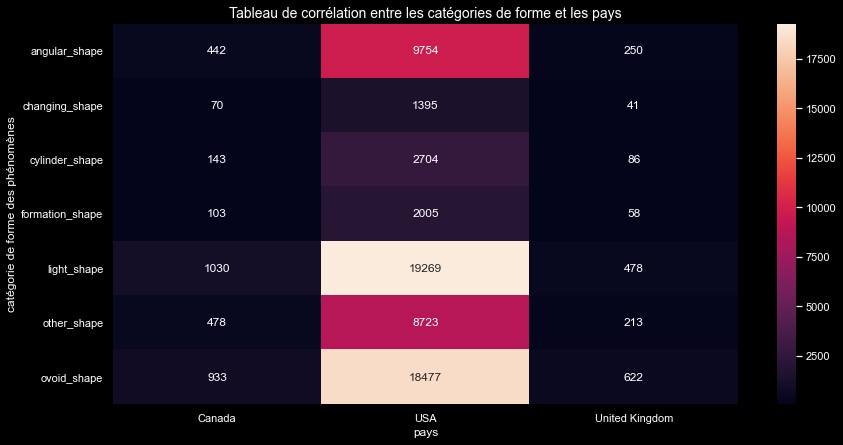

In [82]:
# graph
plt.figure(figsize=(14, 7))

sns.heatmap(pd.crosstab(df_ufo['cat_UFO_shape'],
                        df_ufo['country']),
            annot=True,
            fmt='d')

# text
plt.ylabel('catégorie de forme des phénomènes',
           size=12)
plt.xlabel('pays',
           size=12)
plt.title('Tableau de corrélation entre les catégories de forme et les pays',
          size=14)
# plt.show()
plt.savefig("tableau de corrélation entre les catégories de forme et les pays.png")

Les USA ont beaucoup de phénomènes répertoriés.  
Il semble y avoir des formes plus récurrentes que d'autres selon le pays.

Heatmaps de **forme** de phénomènes et fonction du pays

Tableau de corrélation entre les catégories de forme et les mois

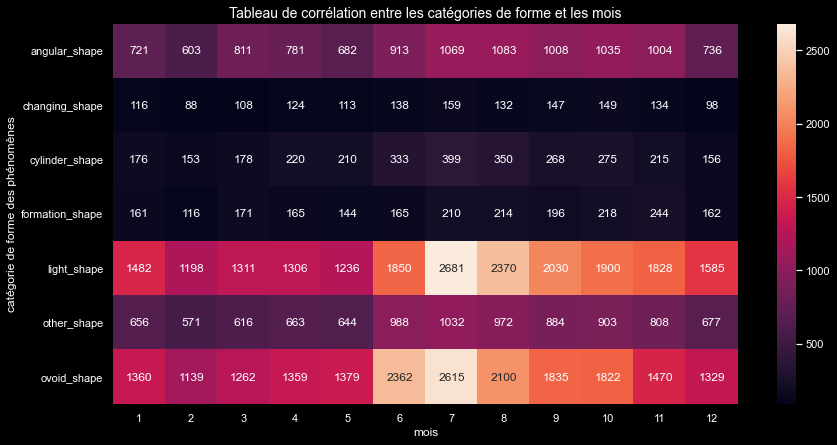

In [83]:
# graph
plt.figure(figsize=(14, 7))
sns.heatmap(pd.crosstab(df_ufo['cat_UFO_shape'],
                        df_ufo['month']),
            annot=True, fmt='d')
# text
plt.ylabel('catégorie de forme des phénomènes',
           size=12)
plt.xlabel('mois',
           size=12)
plt.title('Tableau de corrélation entre les catégories de forme et les mois',
          size=14)
# plt.show()
plt.savefig("tableau de corrélation entre les catégories de forme et les mois.png")

Tableau de corrélation entre les catégories de forme et la durée des phénomènes

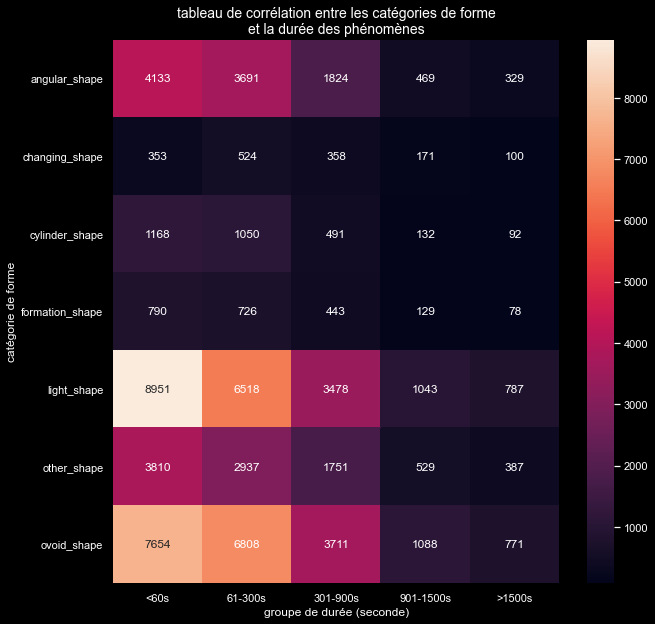

In [84]:
# variables qualitatives :
quali = ['hour', 'month', 'year', 'day', 'gpe_duration']
# graph
plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df_ufo['cat_UFO_shape'],
                        df_ufo['gpe_duration']),
            annot=True, fmt='d')
# text
plt.title('tableau de corrélation entre les catégories de forme\net la durée des phénomènes',
          size=14)
plt.xlabel('groupe de durée (seconde)', size=12)
plt.ylabel('catégorie de forme', size=12)

plt.savefig("tableau de corrélation entre les catégories de forme et la durée des phénomènes.png")
# plt.show()

Tableau de corrélation entre les catégories de forme et les autres variables (mois, jour, gpe-duration, heure)

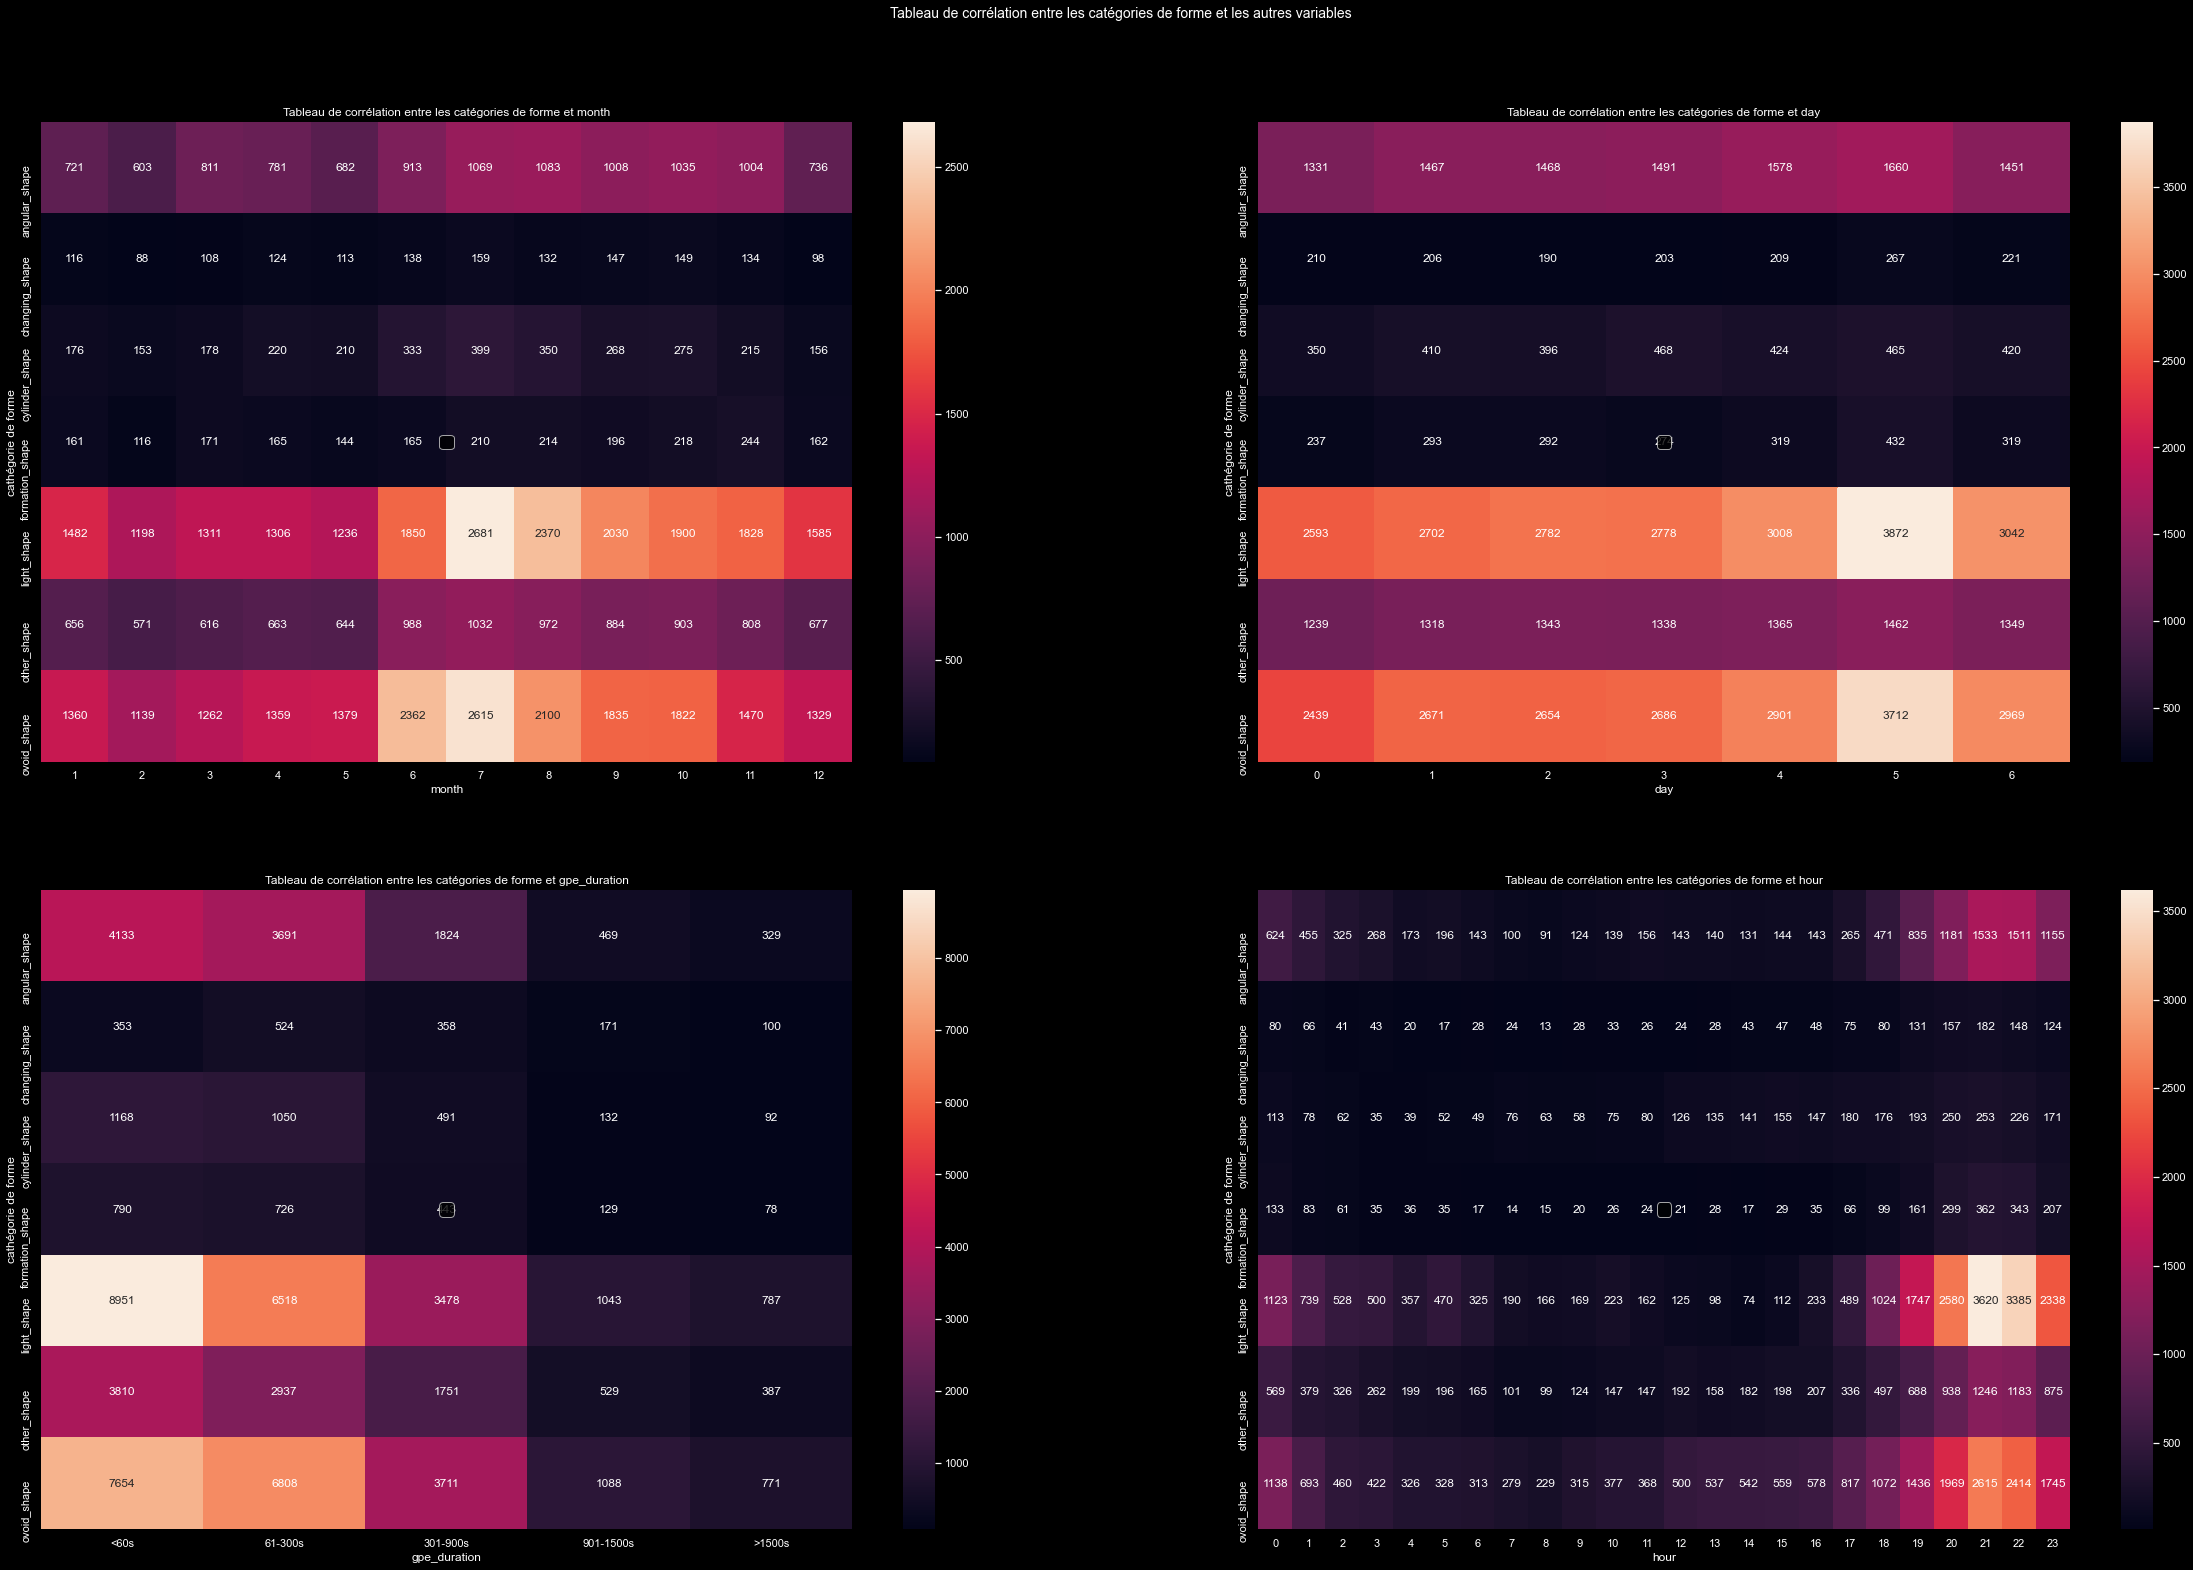

In [85]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# Graph
fig = plt.figure(figsize=(40, 40))

# variables qualitatives :
quali = ['month', 'day', 'gpe_duration', 'hour']

fig.suptitle('Tableau de corrélation entre les catégories de forme et les autres variables',
             y=0.92, size=14)

for variable in quali:
    plt.subplot(a, b, c)
    sns.heatmap(pd.crosstab(df_ufo['cat_UFO_shape'],
                            df_ufo[variable]),                
                annot=True,
                fmt='d',
                label=variable)
    plt.title(f'Tableau de corrélation entre les catégories de forme et {variable}')
    plt.xlabel(variable,
               size=12)
    plt.ylabel('cathégorie de forme',
               size=12)
    plt.legend(loc='center',
               fontsize=18,
               labels=variable)
    c += 1

plt.savefig("tableau de corrélation entre les catégories de forme et les autres variables.png")
# plt.show()

## Etude des phénomènes (USA, Canada, UK)

#### Etude des `UFO_shape`

Quelles sont les formes les plus fréquemment observées ?

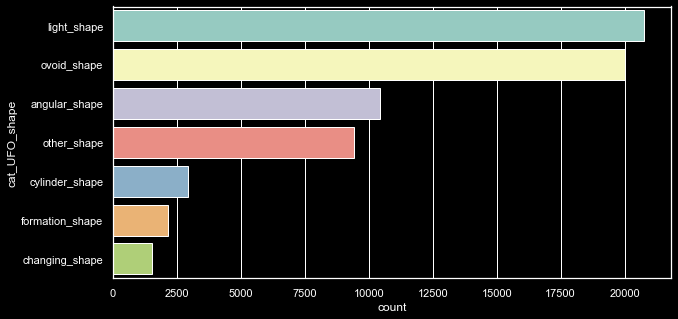

In [86]:
# Fréquence des phénomènes les 3 pays confondus
plt.figure(figsize=(10, 5))
UFO_shape_order = df_ufo['cat_UFO_shape'].value_counts().index
sns.countplot(y="cat_UFO_shape",
              order=UFO_shape_order,
              data=df_ufo)
plt.show();

Les formes lumineuses sont les plus fréquentes, suivies des formes ovoïdes.

Export du fichier pour Tableau

In [87]:
df_ufo.to_csv("ufo_us_uk_canada_shape.csv", index=False, encoding='UTF-8')

Quelles sont les phénomènes qui sont les plus longs ?

In [88]:
# Group by "cat_UFO_shape" then agglomarate by the mean of "length_of_encounter_seconds" value
df_cat_ufo_sec_mean = df_ufo.groupby("cat_UFO_shape")\
    .agg(mean_length_of_encounter_seconds=("length_of_encounter_seconds",
                                           "mean"))\
    .reset_index()

In [89]:
# Sort by ascending "mean_length_of_encounter_seconds" value
df_ufo_count_order = df_cat_ufo_sec_mean.sort_values(
    by='mean_length_of_encounter_seconds', ascending=False)

Classement décroissant des durées moyennes (`mean_length_of_encounter_seconds`) des catégories UFO (`cat_UFO_shape`) 

In [90]:
df_ufo_count_order

,cat_UFO_shape,mean_length_of_encounter_seconds
1,changing_shape,499.595153
3,formation_shape,349.282216
5,other_shape,341.794973
6,ovoid_shape,340.268147
4,light_shape,315.619783
0,angular_shape,310.628085
2,cylinder_shape,308.018155


Les phénomènes changeants sont les plus longs.  
Les plus courts, étant les phénomènes angulaires ou cylindriques.

Le type de phénomènes dépend de la localisation.  
Etudions la fréquence des différents phénomènes en fonction des pays

Plotly

In [91]:
df_ufo_count = df_ufo.groupby(["cat_UFO_shape", "country"]).agg(
    count_cat_UFO_shape=(
        "cat_UFO_shape", "count")
).reset_index(
).sort_values(by='count_cat_UFO_shape')

In [92]:
df_ufo_count.head(2)

,cat_UFO_shape,country,count_cat_UFO_shape
5,changing_shape,United Kingdom,41
11,formation_shape,United Kingdom,58


In [93]:
# Couleur définie pour chaque pays 
colors = list(COLORS.values())

# graph
fig = px.bar(df_ufo_count,
             y='cat_UFO_shape',
             x='count_cat_UFO_shape',
             text='count_cat_UFO_shape',
             labels={'count_cat_UFO_shape': 'Nombre de phénomènes',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='country',
             color_discrete_sequence=colors,
             template=TEMPLATE)

# text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Fréquence des phénomènes par pays<br>'
                  '<sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

# axes
fig.update_xaxes(showgrid=True, ticks="outside")

# annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Les phénomènes **ovoïdes** sont les plus fréquents en **UK**     

Le **Canada** et les **USA** ont les mêmes fréquences de phénomènes, les phénomènes **lumineux** étant majoritaires.

Etudions la durée des différents phénomènes en fonction des pays

In [94]:
# Group by "country" then agglomarate by the mean of "length_of_encounter_seconds" value
df_pays_sec_mean = df_ufo.groupby("country").agg(
    mean_length_of_encounter_seconds=("length_of_encounter_seconds",
                                      "mean"))\
    .reset_index()

In [95]:
# Sort by descending "mean_length_of_encounter_seconds" value
df_ufo_count_order = df_pays_sec_mean.sort_values(
    by='mean_length_of_encounter_seconds', ascending=False)

plotly

In [96]:
df_cat_ufo_sec_mean_country = df_ufo.groupby(["cat_UFO_shape", "country"])\
    .agg(mean_length_of_encounter_seconds=("length_of_encounter_seconds",
                                           "mean")
         ).reset_index(
).sort_values(by="mean_length_of_encounter_seconds")

In [97]:
df_cat_ufo_sec_mean_country.head(2)

,cat_UFO_shape,country,mean_length_of_encounter_seconds
0,angular_shape,Canada,224.876742
6,cylinder_shape,Canada,254.076923


In [98]:
# Graph
fig = px.bar(df_cat_ufo_sec_mean_country,
             y='cat_UFO_shape',
             x='mean_length_of_encounter_seconds',
             text='mean_length_of_encounter_seconds',
             labels={'mean_length_of_encounter_seconds': 'Durée moyenne du phénomène (seconde)',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color='country',
             color_discrete_sequence=colors,
             template=TEMPLATE)

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Durées moyennes des phénomènes par pays<br><sup>USA, Canada, United Kingdom</sup>',
                  showlegend=True)

fig.update_xaxes(showgrid=True, ticks="outside")

# Annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
# , barmode='group' pour afficher en col chaque pays

fig.show()

Les phénomènes ont une durée **plus courte au Canada**.  
Dans l'ensemble, il ne semble pas y avoir une grande différence de durée en fonction du pays

#### Etude temporelle des phénomènes

Distribution du nombre de phénomènes de 1910 à 2014 les 3 pays confondus

In [99]:
# Group by "year" then agglomarate by the count of "UFO_shape" value
df_date_gp = df_ufo.groupby(["year"]).agg(
    count_ufo_shape=("UFO_shape", "count"))

In [100]:
df_date_gp.reset_index(inplace=True)

In [101]:
df_date_gp.head(2)

,year,count_ufo_shape
0,1910,2
1,1920,1


Distribution des phénomènes de 1910 à 2014 par pays

Plotly

In [102]:
df_date_gp_country = df_ufo.groupby(["year", "country"]).agg(
    count_ufo_shape=("UFO_shape", "count")
).reset_index()

In [103]:
# Colors of country
colors = ['#0d0887', '#fdca26',  '#35b779']

# Graph
fig = px.bar(df_date_gp_country,
             y='count_ufo_shape',
             x='year',
             text='count_ufo_shape',
             labels={'count_ufo_shape': 'Nombre de phénomènes',
                     'year': 'année'},
             color="country",
             color_discrete_sequence=colors,
             template=TEMPLATE)

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Evolution du nombre de phénomènes par pays<br>'
                  '<sup>de 1910 à 2014</sup>',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=True,
                        showticklabels=True,                     
                        linewidth=2,
                        ticks='outside',
                        tickfont=dict(
                            family='Arial',
                            size=12,                           
                        ),
                  ),
                  yaxis=dict(
                      showgrid=True,
                      zeroline=False,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,                         
                      ),
                  )
                  #                   plot_bgcolor='white'
                  )
# Annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Lineplot

In [104]:
# Graph
fig = px.line(df_date_gp_country,
              x='year',
              y='count_ufo_shape',
              labels={'count_ufo_shape': 'Nombre de phénomènes',
                      'year': 'année'},
              color='country',
              color_discrete_sequence=colors,
              template=TEMPLATE)

# Text
fig.update_layout(title='Evolution du nombre de phénomènes par pays<br>'
                  '<sup>de 1910 à 2014</sup>',
                  showlegend=True)

# Annotations
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Canada : beaucoup d'observations en 2003  
UK : beaucoup d'observations en 2009  
USA : beaucoup d'observations en 2012

Distribution générale du nombre de phénomènes au cours des mois

In [105]:
# Group by "country" and "month" then agglomarate by the count of "cat_UFO_shape" value
df_gpc = df_ufo.groupby(['country', 
                         'month']).agg(
                count_ufo_shape=("cat_UFO_shape", 
                                 "count"))

In [106]:
df_gpc.reset_index(inplace=True)

Plotly

In [107]:
# Colors
colors = ['#fdca26', '#0d0887',  '#35b779']

# Graph
fig = px.bar(df_gpc,
             y='count_ufo_shape',
             x='month',
             text='count_ufo_shape',
             labels={'count_ufo_shape': 'Nombre de phénomènes',
                     'month': 'Mois'},
             color="country",
             color_discrete_sequence=colors,
             barmode='group',
             template=TEMPLATE)

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Evolution des phénomènes par pays<br>'
                  'par mois<br>',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=[1, 2, 3, 4,
                                  5, 6, 7, 8,
                                  9, 10, 11, 12],
                        ticktext=['janvier', 'février', 'mars', 'avril',
                                  'mai', 'juin', 'juillet', 'août',
                                  'septembre', 'octobre', 'novembre', 'décembre'],
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=False,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'
                  )

# Annotations
annotations = []

# Graph 
annotations.append(dict(xref='x', yref='y', x=7, y=7497,
                        text="max=7497",
                        showarrow=True,
                        font=dict(
                            family="Arial, monospace",
                            size=14,
                            color="#ffffff"
                        ),
                        align="center",
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor="#636363",
                        ax=62,
                        ay=-40,
                        bgcolor="#3366CC",
                        opacity=0.8
                        ))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: Source: fichier ufo_state_us_ca_gb_clean.csv  ' +
                        '  Durée max des phénomènes retenue : 1800 secondes',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Les USA ont un grand nombre de phénomènes référencés  
Pour les 3 pays, on observe une augmentation du nombre de phénomènes en été

Distribution mensuelle des phénomènes observés par pays

Création d'une variable `prop_ufo %` qui correspond à la proportion de phénomènes par catégorie de forme par mois et par pays

In [108]:
# Group by "country", "month" and "cat_UFO_shape" then agglomarate by the count of "cat_UFO_shape" value
df_month_ufo = df_ufo.groupby(["country", "month",
                               "cat_UFO_shape"]).agg(
    count_ufo_shape=("cat_UFO_shape",
                     "count")
).reset_index()

Nombre de phénomènes par pays et par mois

In [109]:
# Group by "country" and "month" then agglomarate by the sum of the count of "cat_UFO_shape" value
# Sum of the event by month and by country
df_UFO_month = df_month_ufo.groupby(["country",
                                     "month"]).agg(
    nb_phenomène=("count_ufo_shape",
                  "sum"))\
    .reset_index()
df_UFO_month.head(2)

,country,month,nb_phenomène
0,Canada,1,156
1,Canada,2,163


Nombre de phénomènes par pays

In [110]:
# Group by "country" then agglomarate by the sum of "nb_phenomène" value
# Total sum of events by country
df_total_country = df_UFO_month.groupby(["country"]).agg(
    total=("nb_phenomène", "sum")
).reset_index()
df_total_country

,country,total
0,Canada,3199
1,USA,62327
2,United Kingdom,1748


Nombre de phénomènes par mois

In [111]:
# Group by "month" then agglomarate by the sum of "nb_phenomène" value
# Total sum of events by month
df_total = df_UFO_month.groupby(["month"]).agg(
    total=("nb_phenomène", "sum")
).reset_index()
df_total.head(2)

,month,total
0,1,4672
1,2,3868


In [112]:
# merge the events by month with events by country
df_UFO_month_prop = pd.merge(df_UFO_month,
                             df_total_country,
                             how='right',
                             on='country')

In [113]:
# ratio
df_UFO_month_prop['prop_ufo %'] = df_UFO_month_prop['nb_phenomène']/df_UFO_month_prop['total']*100

Création de la variable `prop_ufo %`

In [114]:
df_UFO_month_prop.tail(10)

,country,month,nb_phenomène,total,prop_ufo %
26,United Kingdom,3,112,1748,6.407323
27,United Kingdom,4,138,1748,7.894737
28,United Kingdom,5,128,1748,7.322654
29,United Kingdom,6,185,1748,10.583524
30,United Kingdom,7,197,1748,11.270023
31,United Kingdom,8,177,1748,10.125858
32,United Kingdom,9,167,1748,9.553776
33,United Kingdom,10,123,1748,7.036613
34,United Kingdom,11,120,1748,6.864989
35,United Kingdom,12,143,1748,8.180778


In [115]:
for item in country_list:
    df_month_ufo.loc[df_month_ufo['country'] == item, 'total'] = \
        df_month_ufo.loc[df_month_ufo['country'] == item, 'count_ufo_shape'].sum()        

In [116]:
for item in country_list:
    df_month_ufo.loc[df_month_ufo['country'] == item, 'prop_ufo %'] = \
        df_month_ufo.loc[df_month_ufo['country'] == item, 'count_ufo_shape']\
        / df_month_ufo.loc[df_month_ufo['country'] == item, 'count_ufo_shape']\
        .sum()*100

Distribution mensuelle du nombre de phénomène par pays

Plotly

In [117]:
df_month_ufo.head(2)

,country,month,cat_UFO_shape,count_ufo_shape,total,prop_ufo %
0,Canada,1,angular_shape,17,3199.0,0.531416
1,Canada,1,changing_shape,10,3199.0,0.312598


In [118]:
# Colors
colors = ['#fdca26', '#0d0887',  '#35b779']
# Graph
fig = px.bar(df_UFO_month_prop,
             y='prop_ufo %',
             x='month',
             labels={'prop_ufo %': 'Proportion de phénomènes (%)',
                     'month': 'Mois'},
             color="country",
             color_discrete_sequence=colors,
             barmode='group',
             text='prop_ufo %',
             template=TEMPLATE)

# text
fig.update_layout(title='Proportion de phénomènes<br>'
                  'par mois<br>',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=[1, 2, 3, 4,
                                  5, 6, 7, 8,
                                  9, 10, 11, 12],
                        ticktext=['janvier', 'février', 'mars', 'avril',
                                  'mai', 'juin', 'juillet', 'août',
                                  'septembre', 'octobre', 'novembre', 'décembre'],
                        tickangle=15,
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=False,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'
                  )

fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

# Annotations
annotations = []

# Source 1
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: PewResearch Center & ' +
                        'Storytelling with data',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

annotations = []

# Source 2
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=-0.14,
                        xanchor='right', yanchor='bottom',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Distribution des phénomènes en fonction de l'heure

In [119]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s


In [120]:
# Group by "country", "hour", "cat_UFO_shape" then agglomarate by the count of "cat_UFO_shape" value
# Count of "cat_UFO_shape" per hour
df_hour_ufo = df_ufo.groupby(["country", "hour",
                              "cat_UFO_shape"]).agg(
    count_ufo_shape=("cat_UFO_shape",
                     "count"))\
    .reset_index()

In [121]:
for item in country_list:
    df_hour_ufo.loc[df_hour_ufo['country'] == item, 'total'] = \
        df_hour_ufo.loc[df_hour_ufo['country'] == item, 'count_ufo_shape']\
        .sum()

In [122]:
for item in country_list:
    df_hour_ufo.loc[df_hour_ufo['country'] == item, 'prop_ufo %'] = \
        df_hour_ufo.loc[df_hour_ufo['country'] == item, 'count_ufo_shape']\
        / df_hour_ufo.loc[df_hour_ufo['country'] == item, 'count_ufo_shape']\
        .sum()*100

In [123]:
# ratio
df_hour_ufo['prop_ufo %'] = df_hour_ufo['count_ufo_shape'] \
    / df_hour_ufo['total']*100

Nombre de phénomènes par pays et par heure

In [124]:
df_UFO_hour = df_hour_ufo.groupby(["country", "hour"]).agg(
    nb_phenomène=("count_ufo_shape", "sum"))\
    .reset_index()
df_UFO_hour.head(2)

,country,hour,nb_phenomène
0,Canada,0,256
1,Canada,1,152


Nombre de phénomènes par pays

In [125]:
df_total_country_hour = df_UFO_hour.groupby(["country"]).agg(
    total=("nb_phenomène", "sum")
).reset_index()
df_total_country_hour

,country,total
0,Canada,3199
1,USA,62327
2,United Kingdom,1748


In [126]:
df_UFO_hour_prop = pd.merge(df_UFO_hour, df_total_country_hour, how='right', on='country')

df_UFO_hour_prop['prop_ufo %'] = df_UFO_hour_prop['nb_phenomène']/df_UFO_hour_prop['total']*100

plotly

In [127]:
df_hour_ufo.groupby(['country', 'hour']
                   ).agg(count_ufo_shape=('count_ufo_shape', 'count')
                        ).reset_index()

,country,hour,count_ufo_shape
0,Canada,0,7
1,Canada,1,7
2,Canada,2,7
3,Canada,3,7
4,Canada,4,6
...,...,...,...
67,United Kingdom,19,7
68,United Kingdom,20,7
69,United Kingdom,21,7
70,United Kingdom,22,7


In [128]:
# Colors
colors = ['#d3fa45', '#245dae', '#08a28a']

# Graph
fig = px.bar(df_UFO_hour_prop,
             y='prop_ufo %',
             x='hour',
             labels={'prop_ufo %': 'Proportion des phénomènes (%)',
                     'hour': 'Heure'},
             color="country",
             color_discrete_sequence=colors,
             template=TEMPLATE
             )

# Text
fig.update_layout(title='Répartition des phénomènes (%)<br>'
                  'en fonction de l\'heure',
                  barmode='group',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=df_hour_ufo['hour'].tolist(),
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'                  
                 )

# Annotation
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.13,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Minimum d'observations de 7h à 16h  
Maximun d'observations entre 21h et 22h  
Plus d'observations nocturnes que diurnes

Distribution des phénomènes en fonction du jour de la semaine

In [129]:
df_day_ufo = df_ufo.groupby(["country", "day", "cat_UFO_shape"]).agg(
    count_ufo_shape=("cat_UFO_shape", "count"))\
    .reset_index()

In [130]:
for item in country_list:
    df_day_ufo.loc[df_day_ufo['country'] == item, 'total'] = \
        df_day_ufo.loc[df_day_ufo['country'] == item, 'count_ufo_shape']\
        .sum()

In [131]:
df_day_ufo['prop_ufo %'] = df_day_ufo['count_ufo_shape'] / df_day_ufo['total']*100

In [132]:
df_day_ufo.tail()

,country,day,cat_UFO_shape,count_ufo_shape,total,prop_ufo %
142,United Kingdom,6,cylinder_shape,22,1748.0,1.258581
143,United Kingdom,6,formation_shape,10,1748.0,0.572082
144,United Kingdom,6,light_shape,77,1748.0,4.405034
145,United Kingdom,6,other_shape,38,1748.0,2.173913
146,United Kingdom,6,ovoid_shape,118,1748.0,6.750572


plotly

In [133]:
df_day_ufo.head(2)

,country,day,cat_UFO_shape,count_ufo_shape,total,prop_ufo %
0,Canada,0,angular_shape,54,3199.0,1.688028
1,Canada,0,changing_shape,8,3199.0,0.250078


In [134]:
df_UFO_day = df_day_ufo.groupby(["country", "day"]).agg(
    nb_phenomène=("count_ufo_shape", "sum"))\
    .reset_index()
df_UFO_day.head(2)

,country,day,nb_phenomène
0,Canada,0,410
1,Canada,1,404


In [135]:
df_total_country_day = df_UFO_day.groupby(["country"]).agg(
    total=("nb_phenomène", "sum")
).reset_index()
df_total_country_day

,country,total
0,Canada,3199
1,USA,62327
2,United Kingdom,1748


In [136]:
df_UFO_day_prop = pd.merge(df_UFO_day, df_total_country_day, how='right', on='country')

df_UFO_day_prop['prop_ufo %'] = df_UFO_day_prop['nb_phenomène']/df_UFO_day_prop['total']*100

In [137]:
# Colors
colors = ['#d3fa45', '#245dae', '#08a28a']

# Graph
fig = px.bar(df_UFO_day_prop,
             y='prop_ufo %',
             x='day',
             text='prop_ufo %',
             labels={'prop_ufo %': 'Proportion des phénomènes (%)',
                     'day': 'Jour'},
             color="country",
             color_discrete_sequence=colors,
             template=TEMPLATE
             )

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Répartition des phénomènes (en %)<br>en fonction du jour de la semaine',
                  barmode='group',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=[0, 1, 2, 3,
                                  4, 5, 6],
                        ticktext=['Lundi', 'Mardi', 'Mercredi', 'Jeudi',
                                  'Vendredi', 'Samedi', 'Dimanche'],
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'                  
                 )

# Annotation
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.13,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Plus d'observation le week end

Les formes des phénomènes varient-elles en fonction des années?

In [138]:
df_ufo_year_shape_gp = df_ufo.groupby(["year"]).agg(
    ufo_shape=("cat_UFO_shape", "value_counts"))\
    .reset_index()

In [139]:
# Colors 
colors = ['#d3fa45', '#245dae', '#08a28a']

# Graph
fig = px.bar(df_ufo_year_shape_gp,
             y='ufo_shape',
             x='year',             
             labels={'ufo_shape': 'Nombre de phénomènes',
                     'year': 'année',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color="cat_UFO_shape",            
             hover_data=['cat_UFO_shape'],             
             template=TEMPLATE
             )

# Text
fig.update_layout(title='Répartition annuelle des formes des phénomènes<br>'
                  '<sup>de 1960 à 2014</sup>',
                  barmode='stack',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',                      
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )                  
                  )

# Annotation
annotations = []


# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.14,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv    ' +
                        '   Pays: Canada, USA, United Kingdom',

                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Dans les années 60, les observations d'ovoïdes étaient les plus fréquentes.
Les phénomènes sont devenus de plus en plus fréquents à partir de 1995  
Les phénomènes lumineux sont de plus en plus fréquents depuis 1995 
1997 a vu l'émergence des phénomènes cylindriques
Ils restent les plus fréquents  
Les phénomènes inexpliqués croissent également 

Les formes des phénomènes varient-elles en fonction des mois?

In [140]:
df_ufo_month_shape_gp = df_ufo.groupby(["month"]).agg(
    ufo_shape=("cat_UFO_shape", "value_counts"))\
    .reset_index()

In [141]:
# Colors 
colors = ['#d3fa45', '#245dae', '#08a28a']

# Graph
fig = px.bar(df_ufo_month_shape_gp,
             y='ufo_shape',
             x='month',
             #              text='prop_ufo %',
             labels={'ufo_shape': 'Nombre de phénomènes',
                     'month': 'mois',
                     'cat_UFO_shape': 'Catégorie de forme'},
             color="cat_UFO_shape",
             color_continuous_scale="Viridis_r",    
             template=TEMPLATE
             )

#  Text
fig.update_layout(title='Répartition mensuelle des formes des phénomènes<br>'
                  '<sup>Canada, USA, United Kingdom</sup>',
                  barmode='group',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=[1, 2, 3, 4,
                                  5, 6, 7, 8,
                                  9, 10, 11, 12],
                        ticktext=['janvier', 'février', 'mars', 'avril',
                                  'mai', 'juin', 'juillet', 'août',
                                  'septembre', 'octobre', 'novembre', 'décembre'],
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                      ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'

                  )

# Annotation
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.13,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',                      
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Les phénomènes lumineux et ovoïdes augmentent en été

Les formes des phénomènes varient-elles en fonction de l'heure

In [142]:
df_ufo_hour_shape_gp = df_ufo.groupby(["hour"]).agg(
    ufo_shape=("cat_UFO_shape", "value_counts"))\
    .reset_index()

In [143]:
df_ufo_hour_shape_gp.head(2)

,hour,cat_UFO_shape,ufo_shape
0,0,ovoid_shape,1138
1,0,light_shape,1123


Dimension du dataset

In [144]:
df_ufo_hour_shape_gp.shape

(168, 3)

plotly

In [145]:
# Colors 
colors = ['#d3fa45', '#245dae', '#08a28a']

fig = px.bar(df_ufo_hour_shape_gp,
             y='ufo_shape',
             x='hour',
             labels={'ufo_shape': 'Nombre de phénomènes',
                     'hour': 'heure',
                    'cat_UFO_shape': 'Catégorie de forme'},
             color="cat_UFO_shape",
             color_continuous_scale="Viridis_r",
             hover_data=['cat_UFO_shape'],
#              barmode='group',
             template=TEMPLATE
             )

# Text
fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside')

fig.update_layout(title='Répartition des formes des phénomènes en fonction de l\'heure<br>'
                  '<sup>Canada, USA, United Kingdom</sup>',
                  barmode='group',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=df_ufo_hour_shape_gp['hour'].tolist(),
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'                  
                 )

# Annotation
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.13,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Il existe une dépendance entre la forme des phénomènes et l'heure d'observation (hypothèse validée par le test de khi2)

Les formes lumineuses et ovoïdes sont plus fréquentes à partir de 17h  
Les formes lumineuses sont moins apparentes en journée  
Les formes ovoïdes décroissent à partir de 00h pour augmenter à partir de 12h  
En général, toutes les différentes formes sont bien observées à partir de 17h

Les formes des phénomènes varient-elles en fonction du jour de la semaine ?

In [146]:
df_ufo_day_shape_gp = df_ufo.groupby(["day"]).agg(
    ufo_shape=("cat_UFO_shape", "value_counts"))\
    .reset_index()

In [147]:
df_ufo_day_shape_gp.head(2)

,day,cat_UFO_shape,ufo_shape
0,0,light_shape,2593
1,0,ovoid_shape,2439


Dimension du dataset

In [148]:
df_ufo_day_shape_gp.shape

(49, 3)

plotly

In [149]:
# Colors 
colors = ['#d3fa45', '#245dae', '#08a28a']

# Graph
fig = px.bar(df_ufo_day_shape_gp,
             y='ufo_shape',
             x='day',
             labels={'ufo_shape': 'Nombre de phénomènes',
                     'day': 'jour',
                    'cat_UFO_shape': 'Catégorie de forme'},
             color="cat_UFO_shape",
             color_continuous_scale="Viridis_r",
             hover_data=['cat_UFO_shape'],
             template=TEMPLATE
             )

fig.update_layout(title='Répartition journalière des formes des phénomènes<br>'
                  '<sup>Canada, USA, United Kingdom</sup>',
                  barmode='group',
                  showlegend=True,
                  xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor='rgb(204, 204, 204)',
                        linewidth=2,
                        ticks='outside',
                        tickvals=[0, 1, 2, 3,
                                  4, 5, 6],
                        ticktext=['Lundi', 'Mardi', 'Mercredi', 'Jeudi',
                                  'Vendredi', 'Samedi', 'Dimanche'],
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(82, 82, 82)'
                        ),
                  ),
                  yaxis=dict(
                      showgrid=False,
                      zeroline=True,
                      showline=False,
                      showticklabels=True,
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)'
                      ),
                  )
                  #                   plot_bgcolor='white'                  
                 )

# Annotation
annotations = []

# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.13,
                        xanchor='center', yanchor='top',
                        text='Source: fichier ufo_state_us_ca_gb_clean.csv',
                        font=dict(family='Arial',
                                  size=12,
                                  color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

Le nombre de forme des phénomènes varie selon le jour. On observe plus de phénomènes le samedi.  
Les phénomènes lumineux dominent quelque soit le jour de la semaine.  
Quelque soit le jour de la semaine, la répartition des formes des phénomène reste la même. 

#### Etude géographique des phénomènes

In [150]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s


Carte des phénomènes 

In [151]:
# Récupération des colonnes intéressantes 
df_ufo_state = df_ufo[["latitude", "longitude", "state/province"]]

In [152]:
# Group by 'state/province' then agglomerate by the mean of 'latitude' and 'longitude' values
df_state_mean = df_ufo_state.groupby('state/province')\
    .agg({'latitude': 'mean',
          'longitude': 'mean'}
        ).reset_index()

In [153]:
# Create map with icon
m = folium.Map(location=[31.53, -99.11], zoom_start=2)
df_state_mean.apply(lambda row: folium.Marker([row["latitude"],
                                               row["longitude"]],
                                                  icon=folium.Icon(icon="info")
                                             ).add_to(m), axis=1)
m

Carte heatmap des phénomènes

In [154]:
# Create map heatmap
m_2 = folium.Map(location=[40, -97.941111], zoom_start=2)
HeatMap(data=df_state_mean[['latitude',
                                'longitude']], radius=10).add_to(m_2)
# save map
# m_2.save('country_map.html')
m_2

Carte des différentes formes de phénomènes

In [155]:
df_ufo.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s


United Kingdom

Importation des données de géolocalisation des aéroports

In [156]:
df_airport = pd.read_csv("osm-world-airports.csv", sep=';',
                         encoding=ENCODAGE, engine='python')

In [157]:
df_airport = df_airport[["Country", "Country code", "Name", "Geo Point"]]

Récupération des données "aéroport" et "phénomènes" relatives au Royaume-Uni

In [158]:
df_airportUK = df_airport.loc[df_airport['Country'] == 'United Kingdom', :]

In [159]:
df_ufo_uk = df_ufo.loc[df_ufo['country'] == 'United Kingdom', :]

Dimension du dataset des phénomènes

In [160]:
df_ufo_uk.shape

(1748, 16)

Récupération des colonnes utiles à l'élaboration de la carte

In [161]:
# Récupération des colonnes interressantes ()
df_ufo_uk_cat_ufo = df_ufo_uk[["latitude",
                               "longitude",
                               "state",
                               "cat_UFO_shape",
                               "state/province"]]

In [162]:
df_ufo_uk_cat_ufo.head(2)

,latitude,longitude,state,cat_UFO_shape,state/province
0,53.200000,-2.916667,North West of England,ovoid_shape,CH
1,51.434722,-3.180000,Wales,ovoid_shape,CF


Décompte des catégories des formes des phénomènes

In [163]:
df_ufo_uk_cat_ufo.cat_UFO_shape.value_counts()

ovoid_shape        622
light_shape        478
angular_shape      250
other_shape        213
cylinder_shape      86
formation_shape     58
changing_shape      41
Name: cat_UFO_shape, dtype: int64

In [164]:
df_uk_map = df_ufo_uk_cat_ufo.groupby(["state", "latitude", "longitude"]).agg(
    count_cat_ufo=("cat_UFO_shape", "value_counts")
).reset_index()

In [165]:
df_uk_map.head(2)

,state,latitude,longitude,cat_UFO_shape,count_cat_ufo
0,East Midlands,51.691111,-4.836389,ovoid_shape,1
1,East Midlands,52.250000,-0.883333,light_shape,3


In [166]:
# Create map with icon
m = folium.Map(location=[50.90, -3.47], zoom_start=6)
df_uk_map.apply(lambda row: folium.Marker([row["latitude"],
                                    row["longitude"]],
                                                  icon=folium.Icon(icon="info")
                                         ).add_to(m), axis=1)
m